In [1]:
import cv2 as cv
import numpy as np
import glob
from matplotlib import pyplot as plt
import matplotlib

from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
%matplotlib inline

(480, 640, 3)


Text(0.5, 0, 'OpenCV histogram')

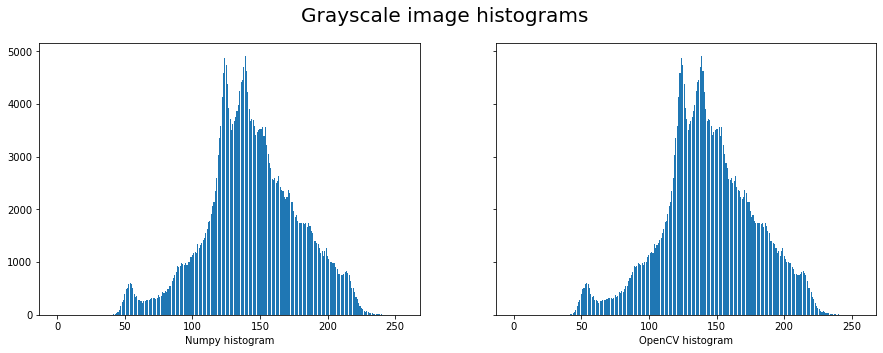

In [2]:
images_folder = "Homework1/"

# 2 test images for initial methods
im = cv.imread("Homework1/ukbench00000.jpg")
im2 = cv.imread("Homework1/ukbench00001.jpg")

fig, axs = plt.subplots(1, 2, sharex='col', sharey='row')
fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('Grayscale image histograms', fontsize=20)

print(im.shape)

gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
hist,bins = np.histogram(gray.ravel(),256,[0,256]) # numpy  grayscale
axs[0].bar(bins[:-1], hist)
axs[0].set_xlabel("Numpy histogram", fontsize=10)
hist_opencv = cv.calcHist([gray],[0],None,[256],[0,256]) # opencv grayscale
axs[1].bar(bins[:-1], hist_opencv[:, 0])
axs[1].set_xlabel("OpenCV histogram", fontsize=10)

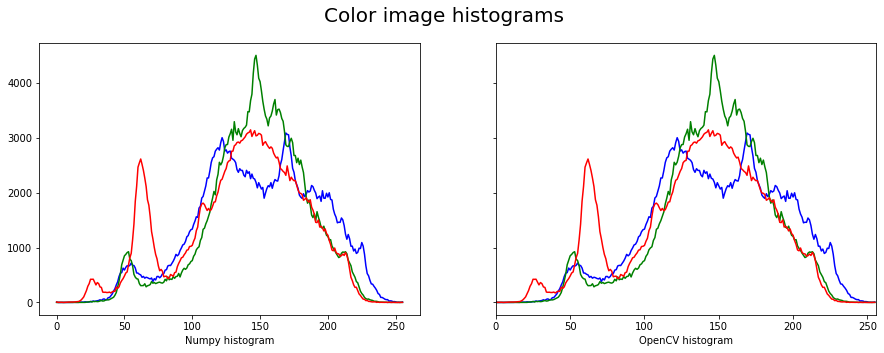

In [3]:
fig, axs = plt.subplots(1, 2, sharex='col', sharey='row')
fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('Color image histograms', fontsize=20)
axs[0].set_xlabel("Numpy histogram", fontsize=10)
axs[1].set_xlabel("OpenCV histogram", fontsize=10)

color = ('b','g','r') # BGR colored image
for i,col in enumerate(color):
    histr = cv.calcHist([im],[i],None,[256],[0,256])
    hist,bins = np.histogram(im[:,:,i],256,[0,256])
    axs[0].plot(histr,color = col)
    axs[1].plot(bins[:-1], hist, color = col)
    plt.xlim([0,256])
plt.show()

In [4]:
def calculate_image_hist(img):
    is_color_image = len(img.shape) == 3
    if is_color_image:
        channels = 3
        height, width, _ = img.shape
    else:
        channels = 1
        height, width = img.shape
    # histogram of 768 elements with parts of 256 elements for every color
    # B G R
    histogram = np.zeros((channels, 256))
    for c in range(channels):
        for i in range(height):
            for j in range(width):
                pixel = img[i,j]
                if is_color_image:
                    histogram[c, pixel[c]] += 1
                else:
                    histogram[c, pixel] += 1
    histogram /= np.sum(histogram)
    return histogram.flatten()
        
def l2_distance(hist1, hist2):
    return np.linalg.norm(hist1-hist2)

As i've found creating histograms only for one channel in OpenCV and numpy libraries, i decided to create a method to have a histogram for all channels and universal for grayscale and color pictures for better comparison and l2 norm calculation between images.

768


<BarContainer object of 768 artists>

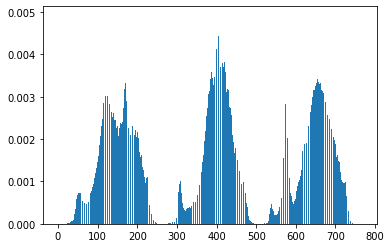

In [5]:
hist = calculate_image_hist(im)
print(len(hist))
plt.bar(list(range(768)),hist)

256


<BarContainer object of 256 artists>

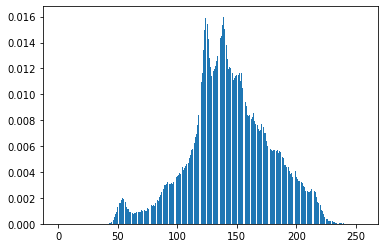

In [6]:
hist_gray = calculate_image_hist(gray)
print(len(hist_gray))
plt.bar(list(range(256)),hist_gray)

So in comparison with OpenCV or Numpy implementation we can see, that it's the same. The only problem I've found is performance, as custom implementation works much much slower, as it is implemented in simple python without usage of C. Also i've added normalization of histogram to have more intuitive l2 norm.

In [8]:
hist_2 = calculate_image_hist(im2)
l2_distance(hist, hist_2)

0.009675331023073944

As we can see, the l2 norm is implemented with numpy, but actually it's only squared diff of correselements in

In [9]:
elements = glob.glob(images_folder + "*.jpg")
images = [cv.imread(file) for file in elements]
histograms = [calculate_image_hist(im) for im in images]

In [170]:
import math

def get_top_n_closest(img_histogram, comp_histograms, n=10):
    hists = []
    for i in range(len(comp_histograms)):
        l2_dist = l2_distance(img_histogram, comp_histograms[i])
        hists.append((i, l2_dist))
    hists = sorted(hists, key=lambda x: x[1])
    return hists[0:n]


def plot_retrived_images(img, query_result_images):
    images_in_line = 5
    fig,axs = plt.subplots(3, images_in_line)
    fig.set_figheight(15)
    fig.set_figwidth(15)
    # removing axes
    axs[0,0].set_axis_off();axs[0,1].set_axis_off();axs[0,3].set_axis_off();axs[0,4].set_axis_off();
    axs[0,2].imshow(img)
    axs[0,2].set_title("Query image")
    axs[0,2].set_axis_off()
    for i in range(10):
        col = math.floor(i / images_in_line) + 1
        row = i % images_in_line
        axs[col,row].set_axis_off()
        axs[col,row].imshow(images[query_result_images[i][0]])
        

def retrieve_images(query_image):
    query_hist = calculate_image_hist(query_image)
    return get_top_n_closest(query_hist, histograms)

In [176]:
query_images = ["ukbench00004.jpg", "ukbench00040.jpg", "ukbench00060.jpg", "ukbench00588.jpg", "ukbench01562.jpg"] 

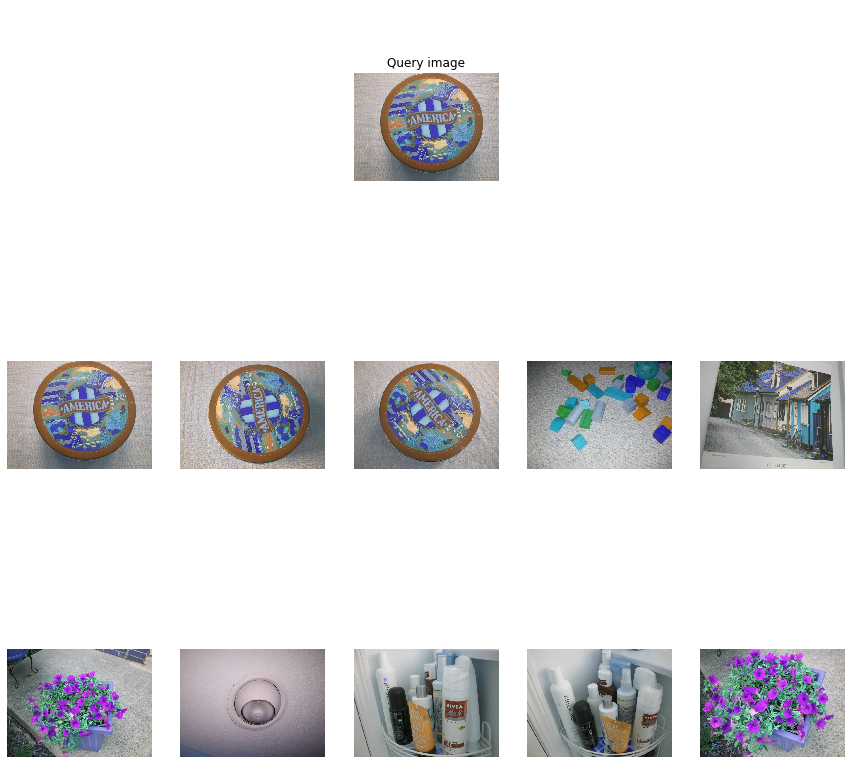

In [177]:
query_1 = cv.imread(images_folder + query_images[0])    
top10_1 = retrieve_images(query_1)
top10_1_images = [images[i[0]] for i in top10_1]
plot_retrived_images(query_1, top10_1)

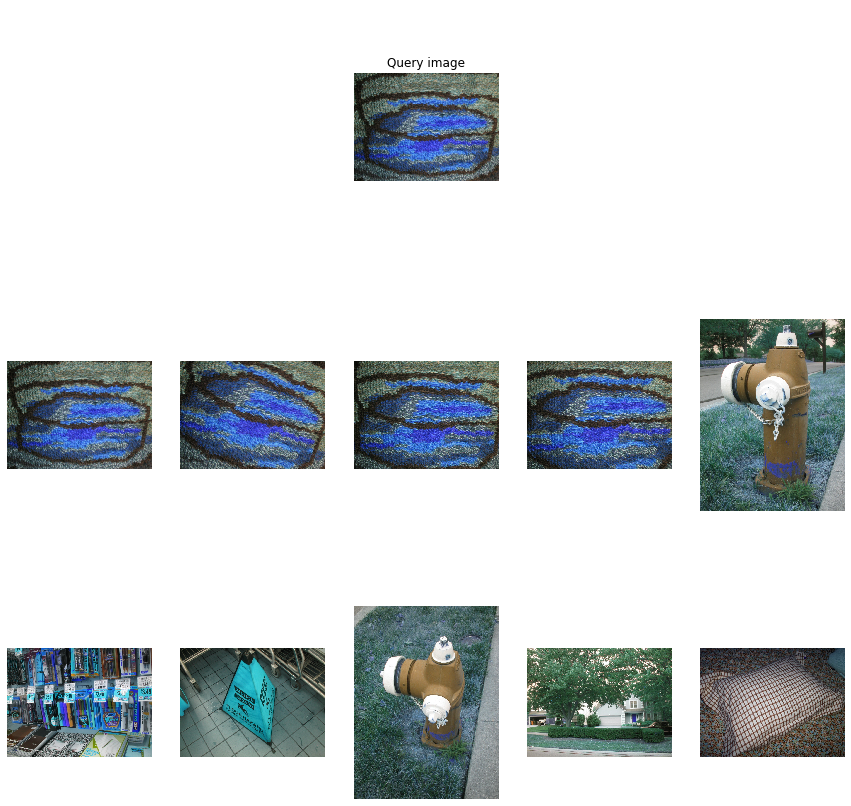

In [124]:
query_2 = cv.imread(images_folder + query_images[1])    
top10_2 = retrieve_images(query_2)
top10_2_images = [images[i[0]] for i in top10_2]
plot_retrived_images(query_2, top10_2)

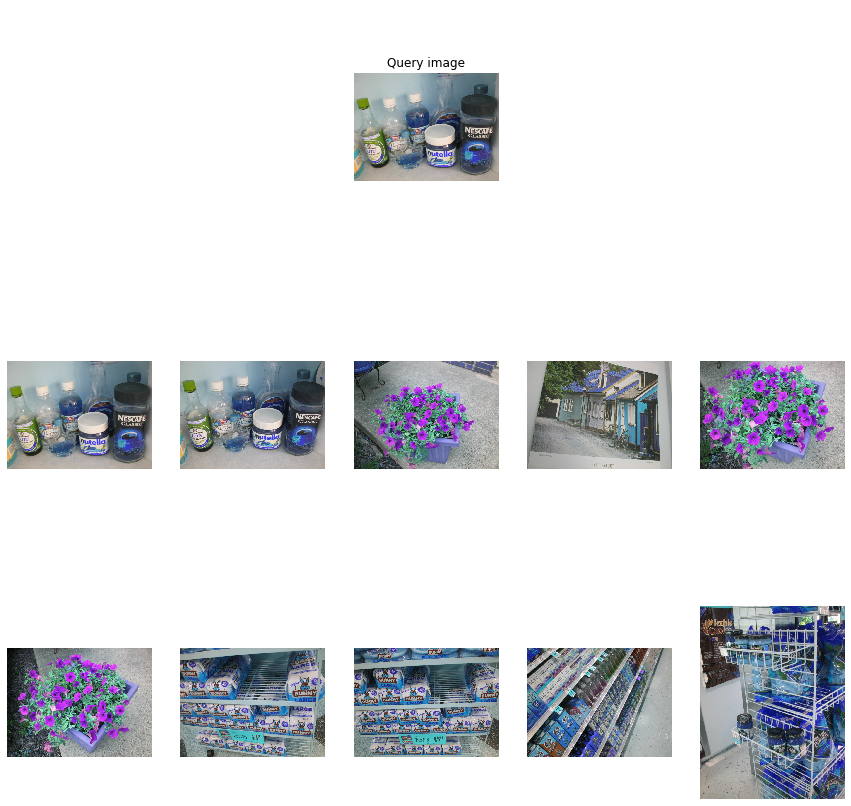

In [217]:
query_3 = cv.imread(images_folder + query_images[2])    
top10_3 = retrieve_images(query_3)
top10_3_images = [images[i[0]] for i in top10_3]
plot_retrived_images(query_3, top10_3)

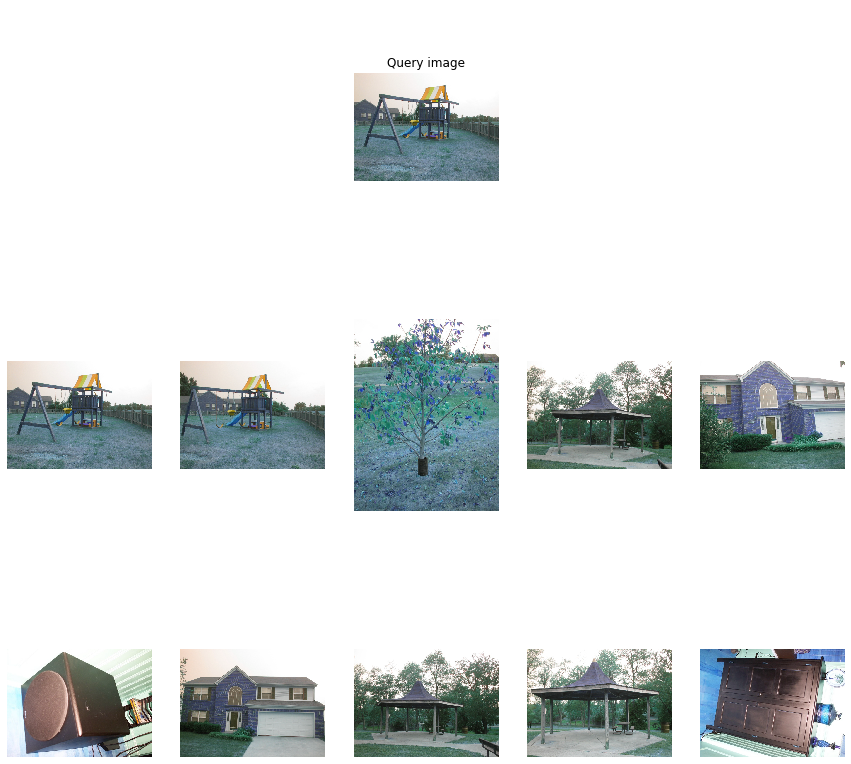

In [218]:
query_4 = cv.imread(images_folder + query_images[3])    
top10_4 = retrieve_images(query_4)
top10_4_images = [images[i[0]] for i in top10_4]
plot_retrived_images(query_4, top10_4)

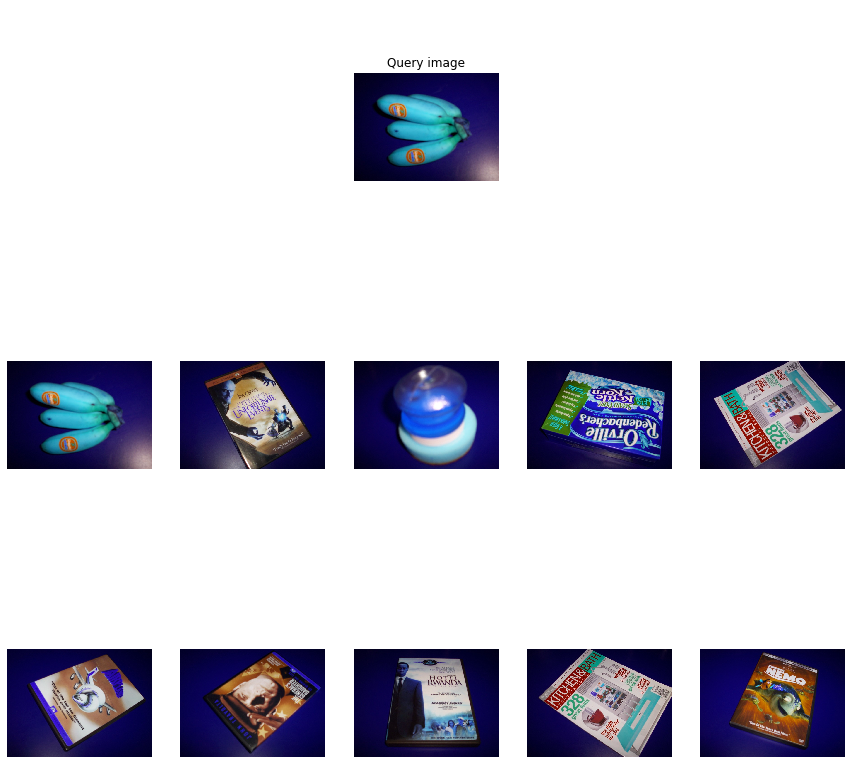

In [219]:
query_5 = cv.imread(images_folder + query_images[4])    
top10_5 = retrieve_images(query_5)
top10_5_images = [images[i[0]] for i in top10_5]
plot_retrived_images(query_5, top10_5)

In [223]:
def precision_recall(correct_images_names, top_n):
    top_n_images_names = set([elements[index].split("/")[1] for index, l2 in top_n])
    correct_images_names = set(correct_images_names)
    tp = len(correct_images_names.intersection(top_n_images_names))
    fp = len(top_n_images_names.difference(correct_images_names))
    total_correct = len(correct_images_names)
    precision = tp / (tp + fp)
    recall = tp / total_correct
    return precision, recall


def get_precision_recall_plot_data(image, correct_images_names):
    precision_recall_arr = []
    image_hist = calculate_image_hist(image)
    for i in range(1, 100):
        top_n = get_top_n_closest(image_hist, histograms, n=i)
        precision, recall = precision_recall(correct_images_names, top_n)
        precision_recall_arr.append((precision, recall))
    return np.array(precision_recall_arr)

In [224]:
def plot_pr_curve(precision_recall_array):
    plt.figure(figsize=(8, 6))
    plt.ylim(0,1.1)
    plt.xlim(0,1.1)
    plt.title("P-R curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.grid(True)
    plt.plot(precision_recall_array[:, 1], precision_recall_array[:, 0], color='b')

Query 1


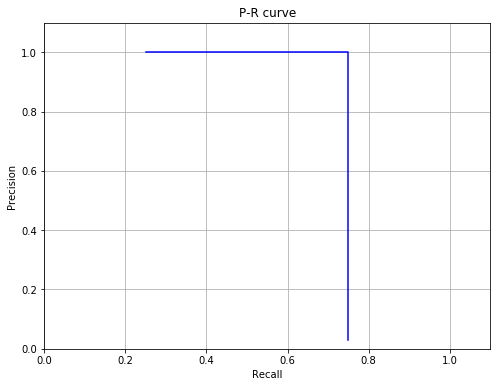

In [231]:
from sklearn.metrics import average_precision_score

query_1 = cv.imread(images_folder + query_images[0])
correct_images = ["ukbench00004.jpg", "ukbench00005.jpg", "ukbench00006.jpg", "ukbench00007.jpg"]
pr = get_precision_recall_plot_data(query_1, correct_images)
plot_pr_curve(pr)
print("Query 1")

Query 2


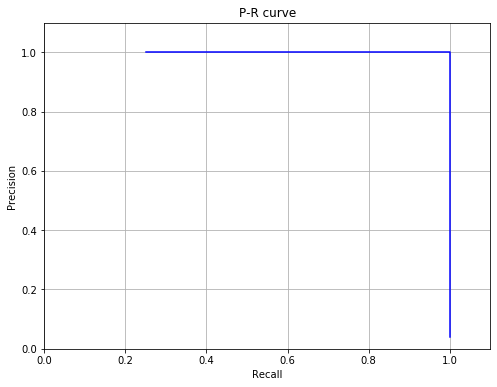

In [232]:
query_1 = cv.imread(images_folder + query_images[1])
correct_images = ["ukbench00040.jpg", "ukbench00041.jpg", "ukbench00042.jpg", "ukbench00043.jpg"]
pr = get_precision_recall_plot_data(query_1, correct_images)
plot_pr_curve(pr)
print("Query 2")

Query 3


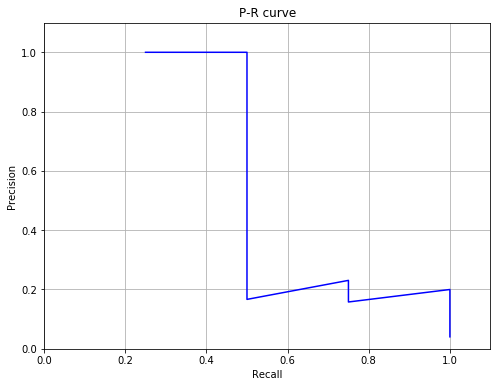

In [230]:
query_1 = cv.imread(images_folder + query_images[2])
correct_images = ["ukbench00060.jpg", "ukbench00061.jpg", "ukbench00062.jpg", "ukbench00063.jpg"]
pr = get_precision_recall_plot_data(query_1, correct_images)
plot_pr_curve(pr)
print("Query 3")

Query 4


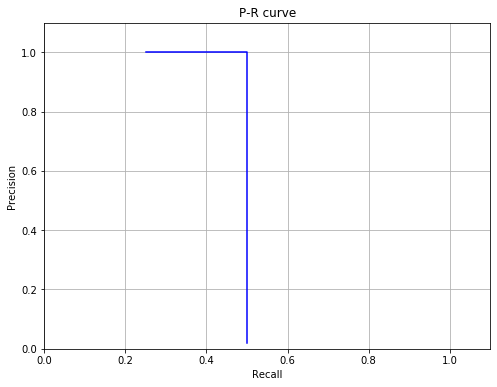

In [233]:
query_1 = cv.imread(images_folder + query_images[3])
correct_images = ["ukbench00588.jpg", "ukbench00589.jpg", "ukbench00560.jpg", "ukbench00561.jpg"]
pr = get_precision_recall_plot_data(query_1, correct_images)
plot_pr_curve(pr)
print("Query 4")

Query 5


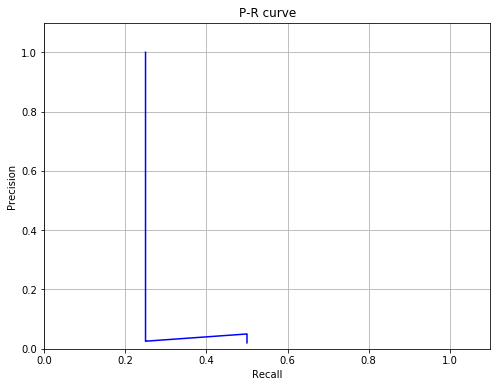

In [235]:
query_1 = cv.imread(images_folder + query_images[4])
correct_images = ["ukbench01562.jpg", "ukbench01563.jpg", "ukbench01564.jpg", "ukbench01565.jpg"]
pr = get_precision_recall_plot_data(query_1, correct_images)
plot_pr_curve(pr)
print("Query 5")

## Conclusions

As we can see our algorithms works not pretty good and we can see, that average number of correctly found images for batch of 10 images is 2 from 4. We can see, that all the failures related to images with similar colors distribution, similar background or colors intensity. The best case was founded only for carpet, but we can see, that this pattern is very specific, so it was recognized pretty good.

Also I've faced with issue, that my custom solution for calculating the histograms works not so good for big amount of images, so i precomputed all 2000 images before analysis.